<a href="https://colab.research.google.com/github/Rinarsm/Pengolahan-Citra-Digital/blob/main/Tugas_8_Pengolahan_Citra_Digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Soal 1. Jelaskan empat jenis tepi yang biasa ditemukan dalam citra digital dan beri contoh masing-masing dalam kehidupan sehari-hari. Mengapa tepi dengan derau memerlukan pendekatan khusus untuk pendeteksian?

Jawab:

->Jenis tepi
- Tepi Step (Step Edge): Tepi ini muncul saat intensitas citra berubah secara tiba-tiba di sepanjang garis batas antara dua area dengan nilai intensitas yang berbeda.
- Tepi Line (Line Edge): Tepi ini terjadi saat intensitas berubah dari terang ke gelap, lalu kembali ke terang (atau sebaliknya) dalam area kecil.
- Tepi Ramp (Ramp Edge): Tepi ini memiliki perubahan intensitas yang bertahap, tidak langsung, seperti gradien.
- Tepi Roof (Roof Edge): Tepi ini mirip dengan line edge, tetapi puncaknya berbentuk seperti atap, dengan perubahan intensitas yang lebih halus.

-> Contoh dalam kehidupan sehari-hari
- Tepi Step (Step Edge) : Tepi antara dinding putih dan pintu hitam.
- Tepi Line (Line Edge) : Kabel listrik yang terlihat kontras terhadap dinding.
- Tepi Ramp (Ramp Edge) : Bayangan benda pada permukaan yang memudar secara perlahan.
- Tepi Roof (Roof Edge) : Puncak genteng rumah yang kontras dengan langit saat dilihat dari kejauhan.

-> Alasan Tepi dengan Derau Memerlukan Pendekatan Khusus
- Mengaburkan atau menambahkan elemen palsu pada tepi sehingga sulit membedakan tepi sebenarnya dengan gangguan.
- Menghasilkan hasil pendeteksian tepi yang tidak akurat, seperti garis tepi ganda atau bercak tidak konsisten.
- Meningkatkan kesalahan algoritma pendeteksian, karena derau menciptakan perbedaan intensitas yang salah.

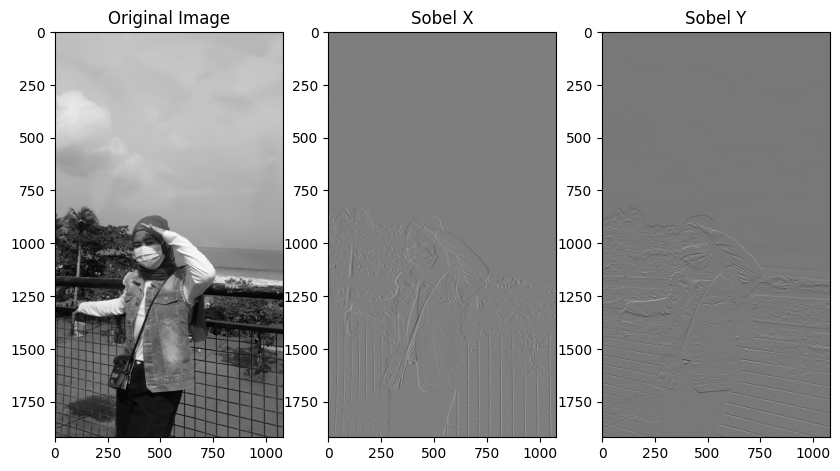

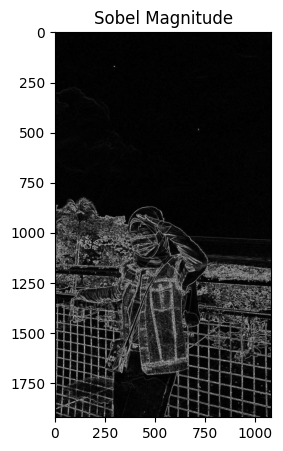

In [1]:
# 2. Operator Sobel dan Prewitt digunakan untuk pendeteksian tepi. Berikan contoh implementasi salah satu operator ini dalam Python menggunakan pustaka seperti NumPy atau OpenCV. Jelaskan langkah-langkahnya secara rinci.

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Langkah 1: Baca gambar dan konversi ke grayscale
image = cv2.imread('gambar.jpg')  # Ganti dengan path gambar
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Langkah 2: Aplikasikan operator Sobel
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # Gradien arah X
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # Gradien arah Y

# Langkah 3: Hitung magnitude gradien
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = np.uint8(np.absolute(sobel_magnitude))  # Konversi ke tipe uint8

# Langkah 4: Tampilkan hasil
plt.figure(figsize=(10, 7))
plt.subplot(1, 3, 1), plt.imshow(gray_image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(1, 3, 3), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Y')
plt.figure(figsize=(5, 5))
plt.imshow(sobel_magnitude, cmap='gray'), plt.title('Sobel Magnitude')
plt.show()


Penjelasan Langkah-Langkah:

- Impor Pustaka: Gunakan pustaka OpenCV untuk operasi citra dan NumPy jika diperlukan untuk manipulasi array.
- Baca Gambar: Gunakan cv2.imread untuk membaca gambar. Konversikan ke grayscale karena pendeteksian tepi lebih efektif pada citra grayscale.
- Aplikasikan Filter Sobel: Gunakan fungsi cv2.Sobel untuk menghitung gradien intensitas dalam arah horizontal (x) dan vertikal (y).
- Gabungkan Gradien: Hitung magnitude gradien untuk menggabungkan kedua arah menggunakan operasi seperti Euclidean norm.
- Tampilkan Hasil: Gunakan fungsi cv2.imshow untuk menampilkan hasil atau simpan hasil dengan cv2.imwrite.

3. Berikan perbandingan antara operator Sobel, Prewitt, dan Canny berdasarkan akurasi dan kompleksitas komputasi. Dalam situasi apa operator Canny lebih direkomendasikan?

 Jawab:

-> perbandingan antara operator Sobel, Prewitt, dan Canny berdasarkan akurasi dan kompleksitas komputasi

- Operator Sobel: Digunakan untuk mendeteksi perubahan intensitas di arah horizontal dan vertikal. Cocok untuk aplikasi sederhana yang tidak memerlukan pendeteksian tepi halus. Akurasi lebih baik daripada Prewitt karena kernel-nya memberikan bobot lebih besar pada piksel pusat, membuatnya lebih peka terhadap perubahan tajam.
- Operator Prewitt: Mirip dengan Sobel tetapi lebih sederhana karena bobot kernel tidak memberikan perhatian khusus pada piksel tengah. Memiliki akurasi lebih rendah dibanding Sobel. Lebih cepat dari Sobel karena kernel lebih sederhana.
- Operator Canny: Menggabungkan penghalusan derau, deteksi tepi, dan penghapusan tepi palsu (melalui non-maximum suppression). Memiliki akurasi tinggi karena hanya mendeteksi tepi yang signifikan. Lebih mahal secara komputasi karena melibatkan beberapa tahap, termasuk filtering Gaussian dan pelacakan tepi melalui ambang batas (hysteresis).

-> Situasi di mana Operator Canny lebih direkomendasikan:
- Gambar dengan Derau Tinggi: Karena operator Canny menyertakan tahap penghalusan (Gaussian blur) untuk mengurangi efek derau.
- Kebutuhan Akurasi Tinggi: Jika diperlukan deteksi tepi yang jelas dan tidak terpengaruh oleh tepi palsu.
- Aplikasi yang Kompleks: Seperti pengenalan objek, pemrosesan gambar medis, atau deteksi fitur dalam citra satelit.
- Kondisi Intensitas Beragam: Canny mampu menangkap tepi dengan perubahan intensitas yang beragam, berkat mekanisme ambang batas ganda (dual-threshold).

Kesimpulan:
Gunakan Prewitt atau Sobel untuk tugas sederhana atau ketika kecepatan lebih diutamakan daripada akurasi.
Pilih Canny untuk aplikasi kritis yang memerlukan pendeteksian tepi yang lebih robust dan akurat, meskipun dengan biaya komputasi lebih tinggi.

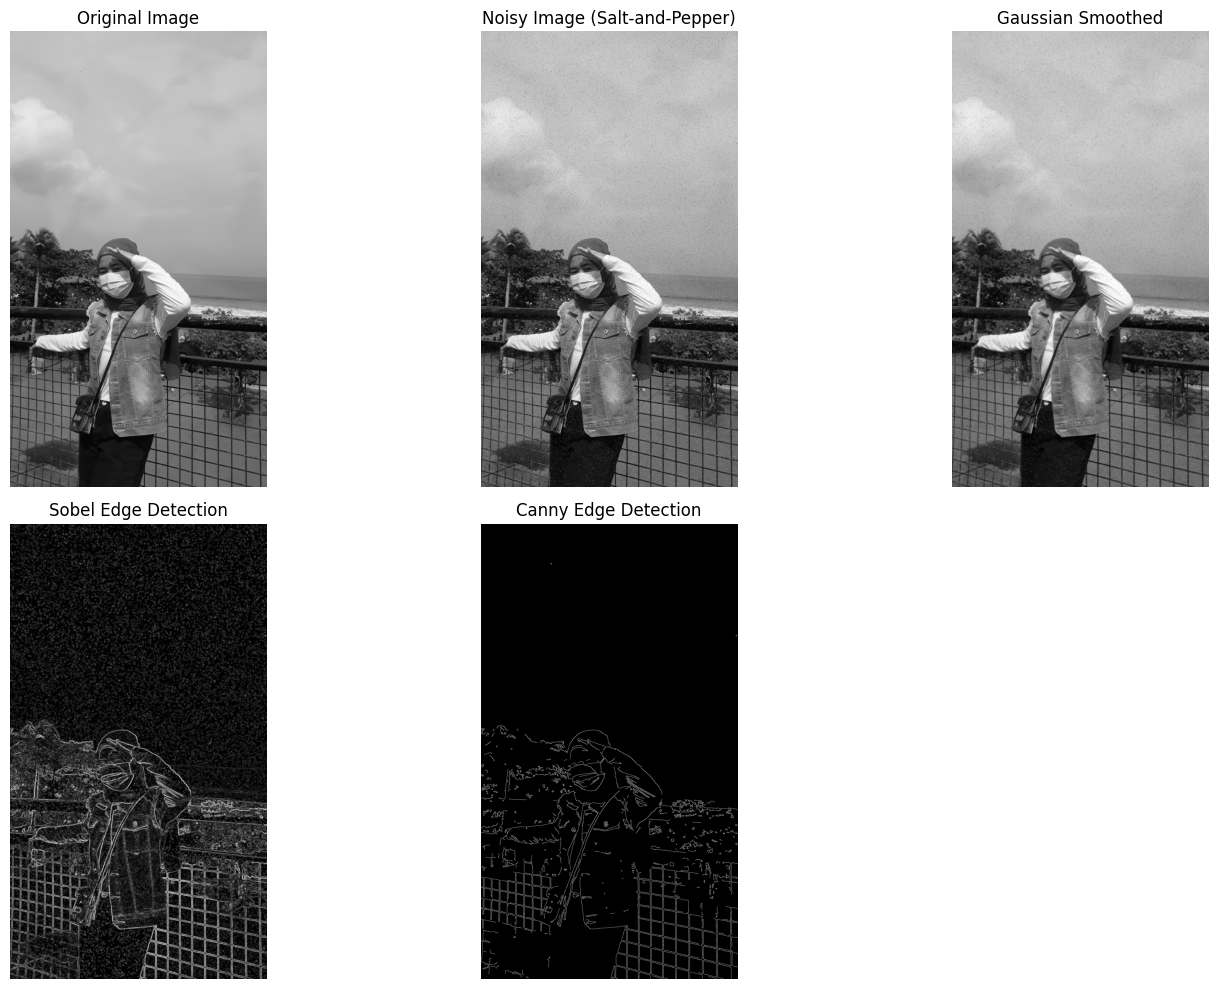

In [2]:
# 3. Gunakan Prewitt atau Sobel untuk tugas sederhana atau ketika kecepatan lebih diutamakan daripada akurasi. Pilih Canny untuk aplikasi kritis yang memerlukan pendeteksian tepi yang lebih robust dan akurat, meskipun dengan biaya komputasi lebih tinggi.

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menambahkan derau salt-and-pepper
def add_salt_and_pepper_noise(image, amount=0.02):
    noisy_image = image.copy()
    num_salt = np.ceil(amount * image.size * 0.5)
    num_pepper = np.ceil(amount * image.size * 0.5)

    # Tambahkan derau "salt"
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255

    # Tambahkan derau "pepper"
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0

    return noisy_image

# Langkah 1: Baca gambar
image = cv2.imread('gambar.jpg', cv2.IMREAD_GRAYSCALE)

# Tambahkan derau salt-and-pepper
noisy_image = add_salt_and_pepper_noise(image)

# Langkah 2: Gaussian Smoothing untuk mengurangi derau
smoothed_image = cv2.GaussianBlur(noisy_image, (5, 5), 1.4)

# Metode 1: Pendeteksian tepi menggunakan Sobel
sobel_x = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = np.uint8(np.absolute(sobel_magnitude))

# Metode 2: Pendeteksian tepi menggunakan Canny
canny_edges = cv2.Canny(smoothed_image, 100, 200)

# Langkah 3: Tampilkan hasil
plt.figure(figsize=(15, 10))

# Gambar asli
plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.axis('off')

# Gambar dengan derau
plt.subplot(2, 3, 2), plt.imshow(noisy_image, cmap='gray'), plt.title('Noisy Image (Salt-and-Pepper)')
plt.axis('off')

# Gambar setelah smoothing
plt.subplot(2, 3, 3), plt.imshow(smoothed_image, cmap='gray'), plt.title('Gaussian Smoothed')
plt.axis('off')

# Hasil Sobel
plt.subplot(2, 3, 4), plt.imshow(sobel_magnitude, cmap='gray'), plt.title('Sobel Edge Detection')
plt.axis('off')

# Hasil Canny
plt.subplot(2, 3, 5), plt.imshow(canny_edges, cmap='gray'), plt.title('Canny Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


Perbandingan Hasil:

- Sobel: Cenderung lebih terpengaruh oleh sisa derau dibandingkan dengan Canny.
Hasil pendeteksian tepi lebih tebal dan kurang detail.
- Canny: Lebih akurat karena melibatkan pengurangan derau dan ambang ganda.
Tepi lebih halus, lebih detail, dan lebih tajam dibanding Sobel.